Below is some exploratory research into the correlations between terrain variables.  You'll find that many terrain-based metrics are strongly correlated.  I've manually separated these into groups, but one could conduct a formal analysis to see how these are related.  For related work, see [Amatulli et al. (2018)](https://doi.org/10.1038/sdata.2018.40).

When viewing the figure at the bottom:

Note a strong first group centered around elevation, which is itself correlated with various types of ruggedness. A second, smaller block partially embedded in this one includes VRM and the SD of Slope. COV (the Coefficient of Variation) is strongly negatively related to the first block.

A second block includes metrics related to curvature, including the Topographic Position Index. Within this block, you can see sub-blocks of tangential and profile curvature, which are related to "general" curvature (they are effectively a component) but not strongly to each other.

In [1]:
import pandas as pd
import neilpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import imageio

In [2]:
# These layers were prepared using my own code, SAGA, and ArcGIS

fns = np.sort(glob.glob('*.tif'))
print(fns)

['00-nasadem_blacksburg_area.tif'
 '01-Terrain Ruggedness Index (TRI) (radius 5).tif'
 '02-Elevation SD (radius 5).tif' '03-Terrain Ruggedness Index (TRI).tif'
 '04-Slope.tif' '05-Elevation COV (radius 5).tif'
 '06-Slope COV (radius 5).tif'
 '07-Vector Ruggedness Measure (VRM) (radius 5).tif'
 '08-Slope SD (radius 5).tif' '09-General Curvature.tif'
 '10-Mean Curvature (radius 5).tif'
 '11-Topographic Position Index (radius 5).tif'
 '12-Pingel Curvature (radius 5).tif' '13-Tangential Curvature.tif'
 '14-Tangential Curvature (radius 5).tif'
 '15-Pingel Tangential Curvature (radius 5).tif'
 '16-Profile Curvature.tif' '17-Profile Curvature (radius 5).tif'
 '18-Pingel Profile Curvature (radius 5).tif']


In [3]:
k = 100000

A, meta = neilpy.imread(fns[0])
# This terrible hack is a function of ArcGIS's poor handling of the edges!
A = A[5:-5,5:-5]
s = np.random.choice(len(A),k,replace=True) 
df = pd.DataFrame()

for fn in fns:
    X = imageio.imread(fn)
    X = X[5:-5,5:-5]
    name = fn[3:-4]
    print(name)
    df[name] = X.flatten()[s]

nasadem_blacksburg_area
Terrain Ruggedness Index (TRI) (radius 5)
Elevation SD (radius 5)
Terrain Ruggedness Index (TRI)
Slope
Elevation COV (radius 5)
Slope COV (radius 5)
Vector Ruggedness Measure (VRM) (radius 5)
Slope SD (radius 5)
General Curvature
Mean Curvature (radius 5)
Topographic Position Index (radius 5)
Pingel Curvature (radius 5)
Tangential Curvature
Tangential Curvature (radius 5)
Pingel Tangential Curvature (radius 5)
Profile Curvature
Profile Curvature (radius 5)
Pingel Profile Curvature (radius 5)


In [4]:
df

,nasadem_blacksburg_area,Terrain Ruggedness Index (TRI) (radius 5),Elevation SD (radius 5),Terrain Ruggedness Index (TRI),Slope,Elevation COV (radius 5),Slope COV (radius 5),Vector Ruggedness Measure (VRM) (radius 5),Slope SD (radius 5),General Curvature,Mean Curvature (radius 5),Topographic Position Index (radius 5),Pingel Curvature (radius 5),Tangential Curvature,Tangential Curvature (radius 5),Pingel Tangential Curvature (radius 5),Profile Curvature,Profile Curvature (radius 5),Pingel Profile Curvature (radius 5)
0,655.532654,11.843966,11.541125,4.154799,16.037741,0.017677,0.197492,0.003316,2.717510,0.004727,0.002219,0.779675,0.001377,0.002715,0.003985,0.000341,-0.000409,0.000453,0.000313
1,681.313599,6.843907,6.842764,1.805867,7.191251,0.010042,0.250829,0.001350,2.333802,0.000361,0.000114,-0.037077,-0.000484,0.000522,0.000531,0.000036,-0.000337,-0.000304,-0.000266
2,639.877075,4.176448,4.132427,1.470352,5.778250,0.006452,0.283685,0.001831,1.678366,-0.001652,-0.001093,-0.177704,-0.000500,-0.001102,-0.001840,-0.000033,0.000277,-0.000345,-0.000214
3,689.828064,5.550413,5.531952,2.227684,8.838467,0.008014,0.360403,0.003308,2.520400,-0.000723,-0.000352,-0.133012,-0.000019,-0.000076,-0.000051,-0.000265,-0.000274,-0.000653,0.000253
4,608.650330,5.626733,5.623833,2.122049,8.408564,0.009237,0.393258,0.002140,2.789606,-0.001596,-0.000773,-0.053370,-0.000516,-0.000102,-0.000063,0.000334,-0.000673,-0.001483,-0.000582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,883.628357,10.345442,8.355682,2.646559,10.136717,0.009522,0.448890,0.033225,6.398301,0.004320,0.002270,1.787735,0.004549,-0.000153,0.000477,-0.000905,0.002209,0.004063,0.003149
99996,601.790527,9.248198,7.166249,2.186585,6.790492,0.011794,0.428754,0.020402,5.092873,-0.010352,-0.005342,-1.714057,-0.001986,-0.003437,-0.005133,-0.001883,-0.001678,-0.005552,0.000886
99997,582.357544,10.194687,9.864438,4.686373,17.771616,0.016864,0.577062,0.009513,6.138467,-0.006356,-0.002969,-0.754899,-0.000561,0.001195,0.000008,0.000730,-0.003828,-0.005947,-0.000986
99998,763.267700,16.816151,13.459718,4.006394,15.262870,0.017870,0.347018,0.039858,6.946774,0.006190,0.002679,2.954585,0.005793,0.001653,0.002638,0.001561,0.001240,0.002719,0.001193


In [5]:
corr = df.corr(method='spearman')
corr = np.round(corr,decimals=2)

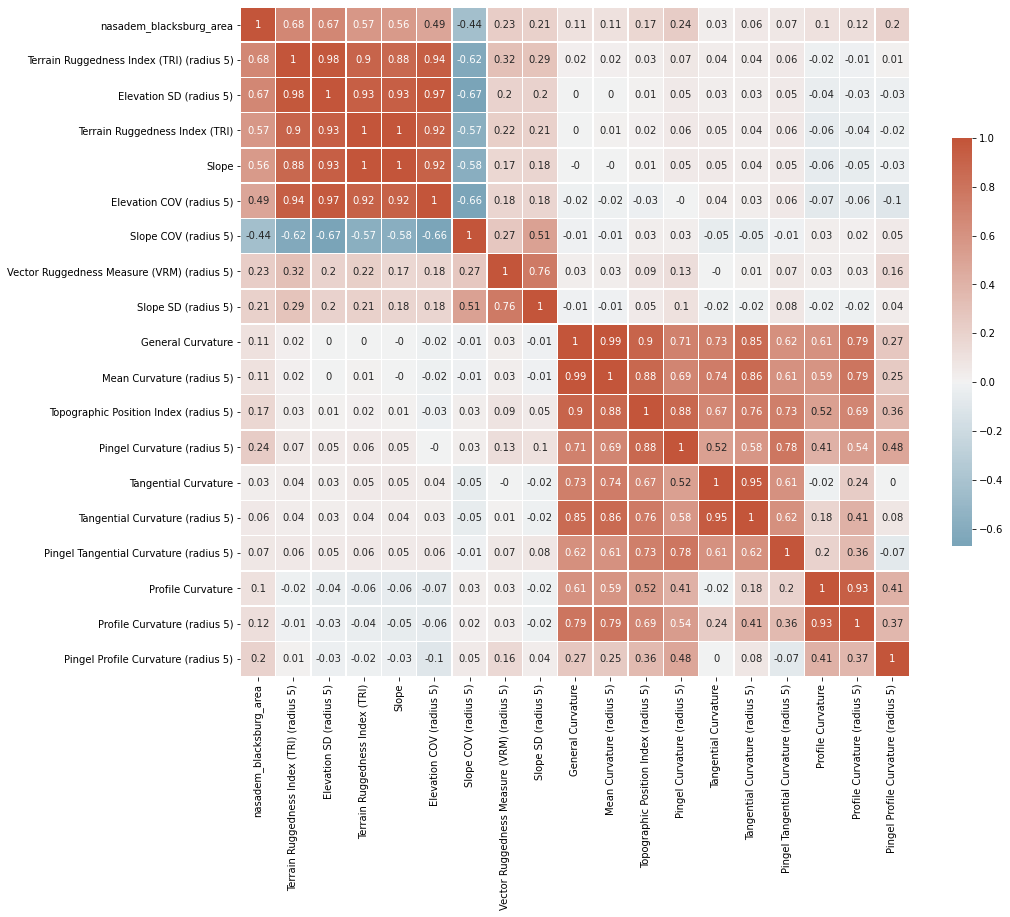

In [6]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True,)

plt.savefig('plot.png', dpi=300, bbox_inches='tight')